<a href="https://colab.research.google.com/github/siddharthmaredu/Statistical-Analysis-Projects/blob/main/Ted%20Talks%20Trend%20Analysis%20Project/TED_Talks_Trend_Analysis_Code_File_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("readxl")
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Install & Load the tidyverse
install.packages("tidyverse")
library(tidyverse)
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df <- read_excel('/content/TED_draft1.xlsx')

In [ ]:
glimpse(df)

Rows: 2,972
Columns: 26
$ TED_ID                     <dbl> 1, 2, 3, 4, 5, 6, 7, 7, 7, 8, 9, 9, 10, 10,…
$ event                      <chr> "TED2006", "TED2006", "TED2006", "TED2006",…
$ num_speaker                <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ main_speaker               <chr> "Ken Robinson", "Al Gore", "David Pogue", "…
$ speaker_occupation         <chr> "Author/educator", "Climate advocate", "Tec…
$ description                <chr> "Sir Ken Robinson makes an entertaining and…
$ duration                   <dbl> 1164, 977, 1286, 1116, 1190, 1305, 992, 992…
$ film_date                  <dttm> 2006-02-25, 2006-02-25, 2006-02-24, 2006-0…
$ published_date             <dttm> 2006-06-27, 2006-06-27, 2006-06-27, 2006-0…
$ languages                  <dbl> 60, 43, 26, 35, 48, 36, 31, 31, 31, 19, 32,…
$ comments                   <dbl> 4553, 265, 124, 200, 593, 672, 919, 919, 91…
$ tags                       <chr> "['children', 'creativity', 'culture', 'dan…
$ title         

In [ ]:
summary(df)

     TED_ID          event            num_speaker   main_speaker      
 Min.   :   1.0   Length:2972        Min.   :1.00   Length:2972       
 1st Qu.: 632.8   Class :character   1st Qu.:1.00   Class :character  
 Median :1280.5   Mode  :character   Median :1.00   Mode  :character  
 Mean   :1284.4                      Mean   :1.03                     
 3rd Qu.:1952.2                      3rd Qu.:1.00                     
 Max.   :2550.0                      Max.   :5.00                     
                                                                      
 speaker_occupation description           duration     
 Length:2972        Length:2972        Min.   : 135.0  
 Class :character   Class :character   1st Qu.: 582.0  
 Mode  :character   Mode  :character   Median : 848.5  
                                       Mean   : 830.1  
                                       3rd Qu.:1047.5  
                                       Max.   :5256.0  
                                        

In [ ]:
# Correlation matrix for numeric columns
cor_matrix <- cor(df[, c("duration", "views", "comments", "languages")])
cor_matrix

,duration,views,comments,languages
duration,1.00000000,0.04171085,0.1369176,-0.3005083
views,0.04171085,1.00000000,0.5130712,0.3799774
comments,0.13691758,0.51307120,1.0000000,0.3106607
languages,-0.30050830,0.37997737,0.3106607,1.0000000


In [ ]:
#Install and load required packages
install.packages(c("tm", "wordcloud", "RColorBrewer"))
library(tm)
library(wordcloud)
library(RColorBrewer)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘slam’, ‘BH’


Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: RColorBrewer



In [ ]:
# Create a text corpus
corpus <- Corpus(VectorSource(df$description))
# Preprocess the text
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, removeWords, c(stopwords("en"),"ted","says","can","shares","new","one","talk","like","make","even","shows","just"))

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, c(stopwords("en"), "ted", :
“transformation drops documents”


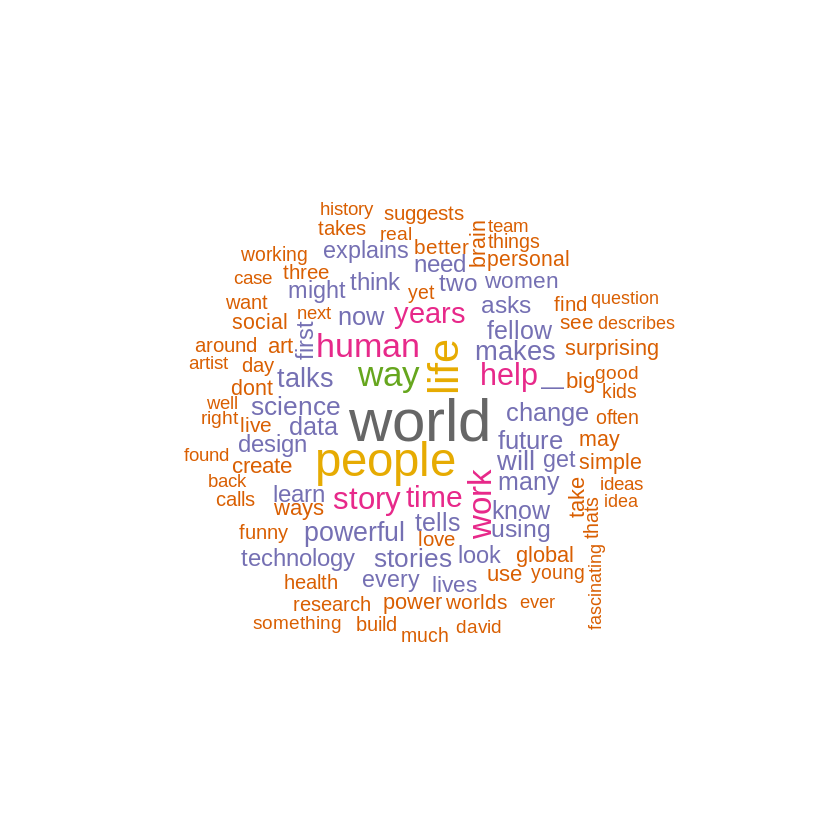

In [ ]:
# Create a word cloud
#set.seed(1234) # For reproducibility
wordcloud(words = corpus, scale = c(3, 0.5), max.words = 100, random.order = FALSE,
 colors = brewer.pal(8, "Dark2"))

In [ ]:
df1 = read.csv("/content/transcripts.csv", sep = ',')

In [ ]:
# Load the data
df1 <- read.csv("/content/transcripts.csv", stringsAsFactors = FALSE)

# Create a corpus from the transcript column
corpus <- Corpus(VectorSource(df1$transcript))
# Custom function to remove special characters
removeSpecialCharacters <- function(x) gsub("[^a-zA-Z0-9 ]", "", x)

# Preprocess the text
corpus <- tm_map(corpus, content_transformer(tolower))
corpus <- tm_map(corpus, removePunctuation)
corpus <- tm_map(corpus, content_transformer(removeSpecialCharacters))  # Remove special characters
corpus <- tm_map(corpus, removeNumbers)
corpus <- tm_map(corpus, stripWhitespace)  # Remove extra white spaces
corpus <- tm_map(corpus, removeWords, c(stopwords("en"), "ted", "says", "can", "shares", "new", "one", "talk", "like", "make", "even", "shows", "just"))

# Convert the corpus to a term-document matrix
tdm <- TermDocumentMatrix(corpus)

# Convert the matrix to a data frame of word frequencies
word_freq <- sort(rowSums(as.matrix(tdm)), decreasing = TRUE)
word_freq <- data.frame(word = names(word_freq), freq = word_freq)




Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, content_transformer(removeSpecialCharacters)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(corpus, removeWords, c(stopwords("en"), "ted", :
“transformation drops documents”


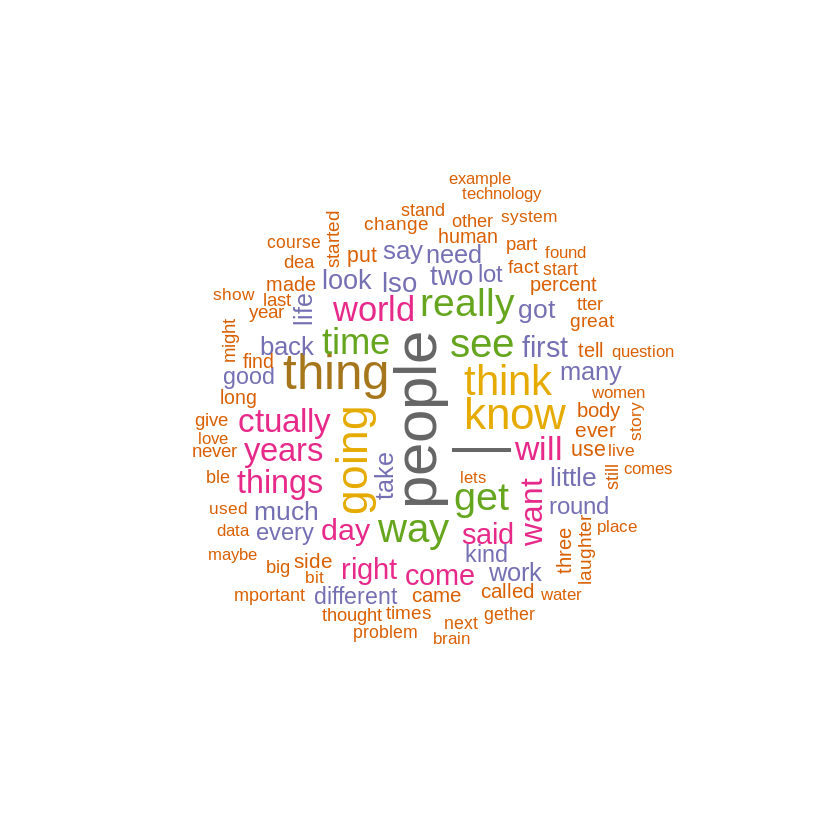

In [ ]:
# Create the word cloud
set.seed(1234) # Optional: for reproducibility
wordcloud(words = word_freq$word, freq = word_freq$freq, scale = c(3, 0.5), max.words = 100, random.order = FALSE, colors = brewer.pal(8, "Dark2"))

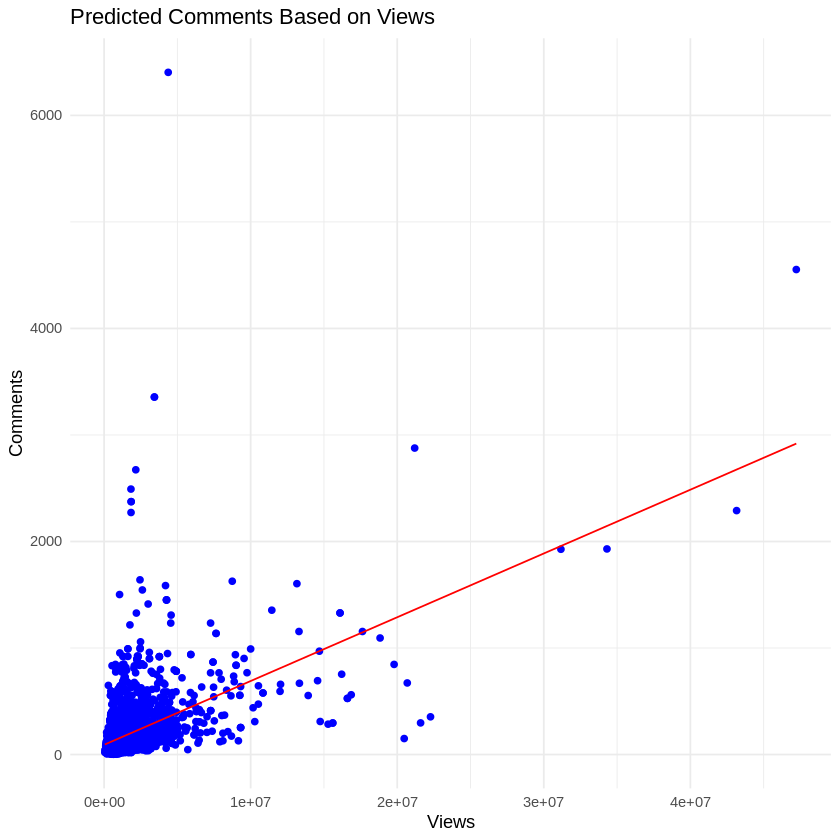

In [ ]:
# Assuming 'df' is your original dataframe with 'views' and 'comments'
model <- lm(comments ~ views, data = df)

# Generate predictions
df$predicted_comments <- predict(model, newdata = df)

# Plot
library(ggplot2)

ggplot(df, aes(x = views)) +
  geom_point(aes(y = comments), colour = "blue") +  # Actual data points
  geom_line(aes(y = predicted_comments), colour = "red") +  # Prediction line
  labs(x = "Views", y = "Comments", title = "Predicted Comments Based on Views") +
  theme_minimal()


In [ ]:
#statistical Modelling
model <- lm(views ~ comments, data = df)
summary(model)
# Predicting comments for a new set of views
predicted_comments <- predict(model, as.data.frame(df$views))

predicted_comments


Call:
lm(formula = views ~ comments, data = df)

Residuals:
      Min        1Q    Median        3Q       Max 
-24634333   -677221   -268705    224595  32232533 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   855414      46259   18.49   <2e-16 ***
comments        4396        135   32.58   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2082000 on 2970 degrees of freedom
Multiple R-squared:  0.2632,	Adjusted R-squared:  0.263 
F-statistic:  1061 on 1 and 2970 DF,  p-value: < 2.2e-16


ERROR: ignored

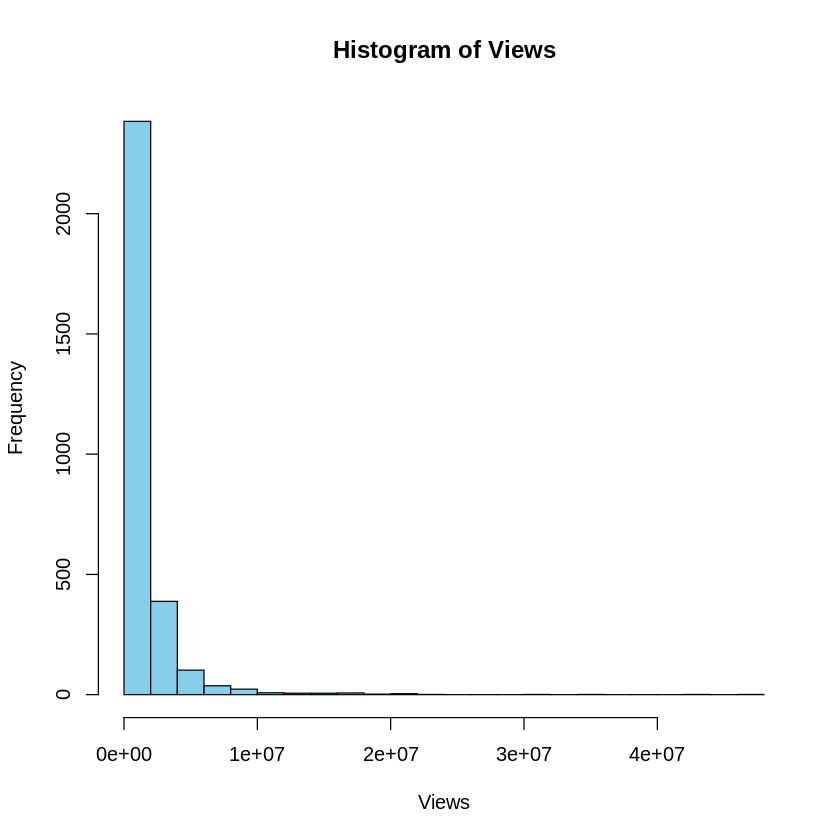

In [ ]:

hist(df$views, breaks = 20, col = "skyblue", xlab = "Views", main = "Histogram of Views")


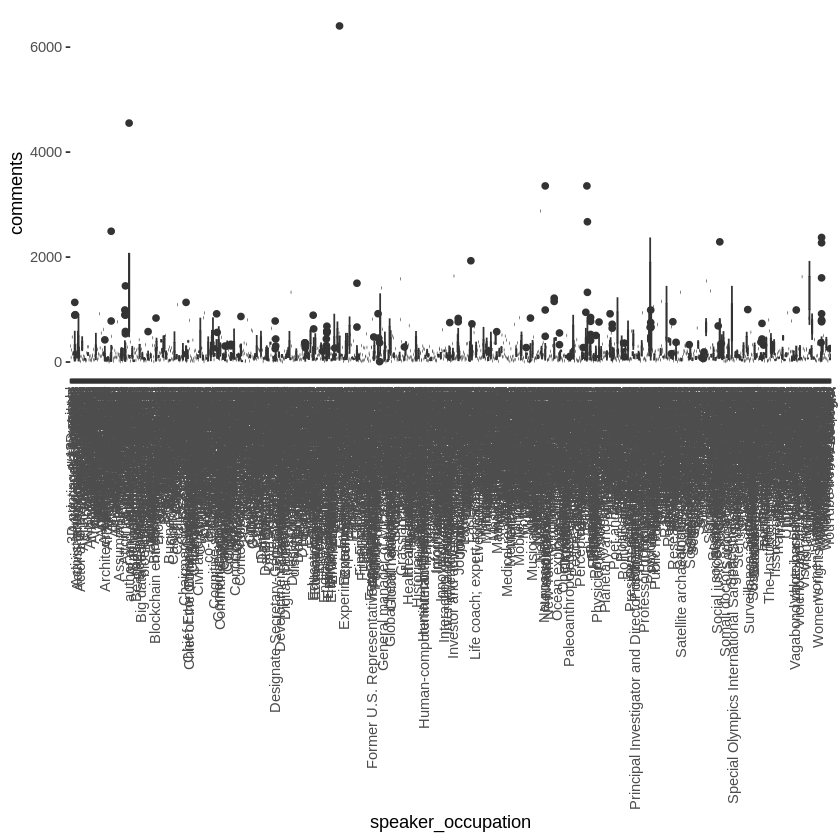

In [ ]:
library(ggplot2)
# Assuming 'your_data' has columns 'comments' and 'speaker_occupation'
ggplot(df, aes(x = speaker_occupation, y = comments)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


In [ ]:
# Install and load necessary packages
install.packages("tidytext")
library(tidytext)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SnowballC’, ‘janeaustenr’, ‘tokenizers’




In [ ]:
# Prepare the text data
text_data <- df %>%
  select(c(description))

In [ ]:
# Tokenize the text and match against the sentiment lexicon
sentiment_data <- text_data %>%
 unnest_tokens(word,description) %>%
 inner_join(get_sentiments("bing"))


Joining with `by = join_by(word)`


In [ ]:
# Compute the sentiment score
sentiment_score <- sentiment_data %>%
 count(sentiment) %>%
 spread(sentiment, n, fill = 0) %>%
 mutate(sentiment_score = positive - negative)
sentiment_score <- sentiment_score %>%
  mutate(neutral = 0)
sentiment_score

negative,positive,sentiment_score,neutral
<dbl>,<dbl>,<dbl>,<dbl>
4425,6531,2106,0


In [ ]:
glimpse(df)

Rows: 2,972
Columns: 26
$ TED_ID                     <dbl> 1, 2, 3, 4, 5, 6, 7, 7, 7, 8, 9, 9, 10, 10,…
$ event                      <chr> "TED2006", "TED2006", "TED2006", "TED2006",…
$ num_speaker                <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ main_speaker               <chr> "Ken Robinson", "Al Gore", "David Pogue", "…
$ speaker_occupation         <chr> "Author/educator", "Climate advocate", "Tec…
$ description                <chr> "Sir Ken Robinson makes an entertaining and…
$ duration                   <dbl> 1164, 977, 1286, 1116, 1190, 1305, 992, 992…
$ film_date                  <dttm> 2006-02-25, 2006-02-25, 2006-02-24, 2006-0…
$ published_date             <dttm> 2006-06-27, 2006-06-27, 2006-06-27, 2006-0…
$ languages                  <dbl> 60, 43, 26, 35, 48, 36, 31, 31, 31, 19, 32,…
$ comments                   <dbl> 4553, 265, 124, 200, 593, 672, 919, 919, 91…
$ tags                       <chr> "['children', 'creativity', 'culture', 'dan…
$ title         

Trend Analysis Over Time, Speaker Analysis, Duration vs Popularity


Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


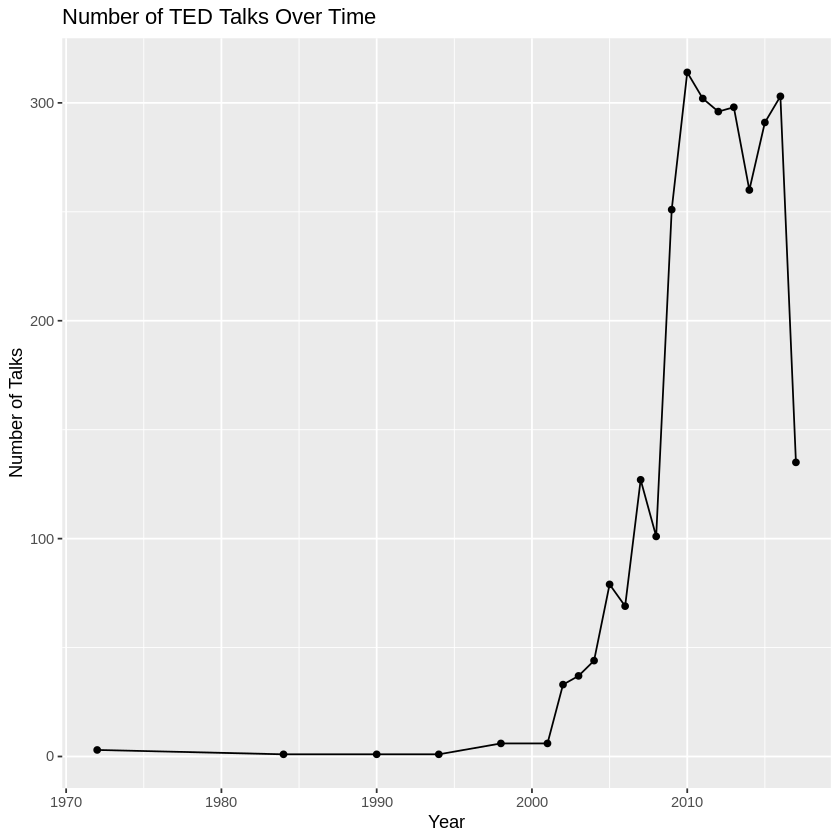

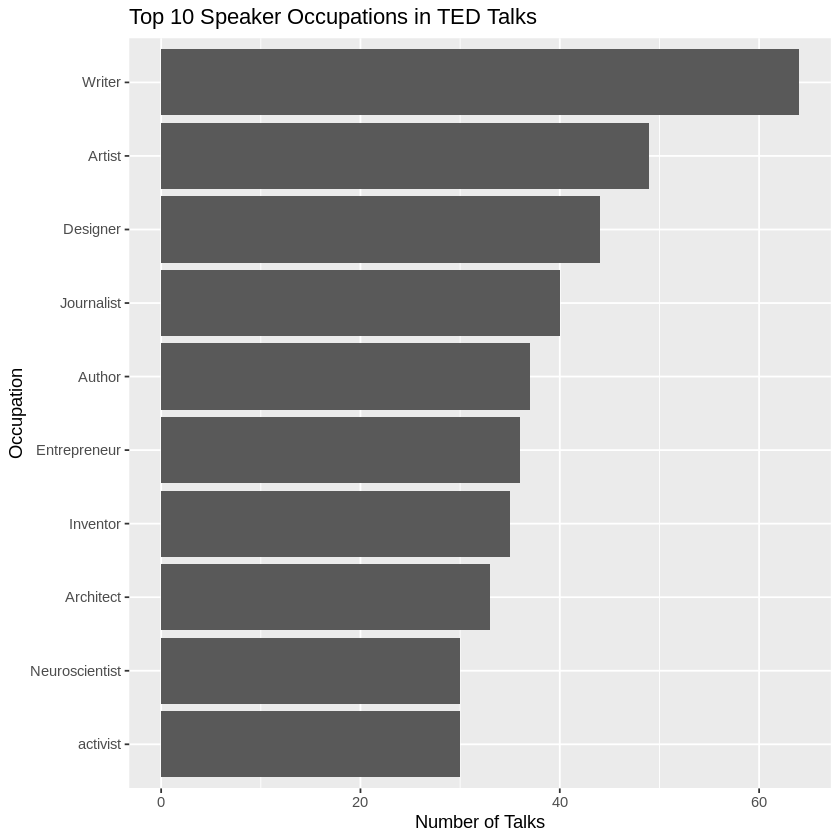

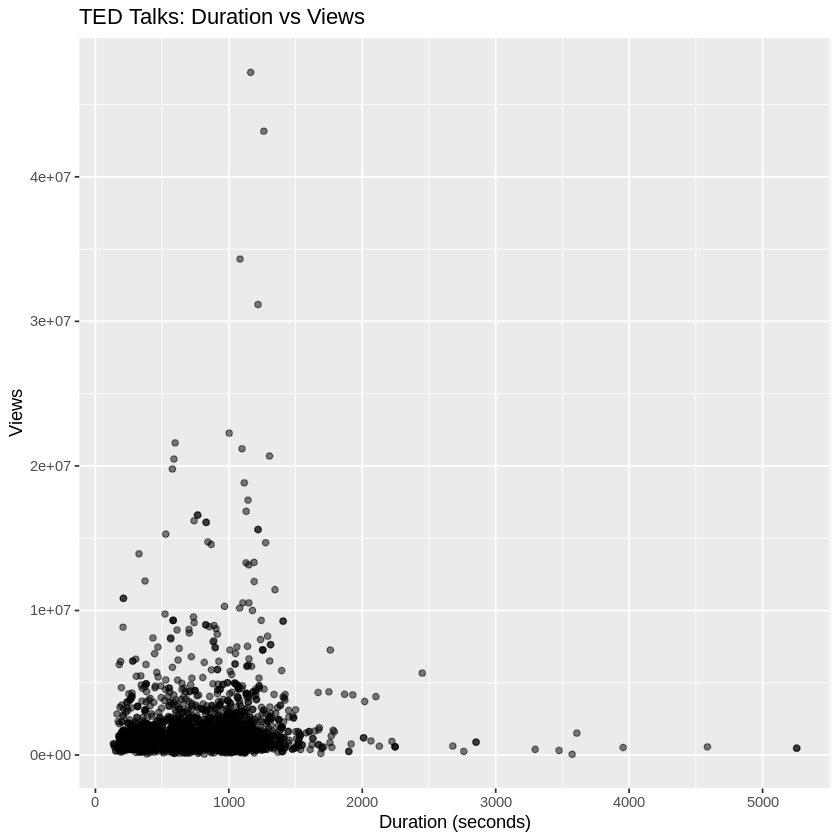

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(lubridate)

# Read the dataset
ted_data <- read_excel("/content/TED_draft1.xlsx")

# Convert dates to year format
ted_data$year_filmed <- year(ted_data$film_date)
ted_data$year_published <- year(ted_data$published_date)

# 1. Trend Analysis Over Time
# Counting the number of TED Talks per year
talks_per_year <- ted_data %>%
  group_by(year_filmed) %>%
  summarize(count = n())

# Plotting the number of TED Talks over time
ggplot(talks_per_year, aes(x = year_filmed, y = count)) +
  geom_line() +
  geom_point() +
  labs(title = "Number of TED Talks Over Time", x = "Year", y = "Number of Talks")

# 2. Speaker Analysis
# Identifying the top 10 most common speaker occupations
top_occupations <- ted_data %>%
  group_by(speaker_occupation) %>%
  summarize(count = n()) %>%
  arrange(desc(count)) %>%
  head(10)

# Plotting the top 10 occupations
ggplot(top_occupations, aes(x = reorder(speaker_occupation, count), y = count)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Top 10 Speaker Occupations in TED Talks", x = "Occupation", y = "Number of Talks")

# 3. Duration vs Popularity
# Analyzing the relationship between the duration of TED Talks and their views
ggplot(ted_data, aes(x = duration, y = views)) +
  geom_point(alpha = 0.5) +
  labs(title = "TED Talks: Duration vs Views", x = "Duration (seconds)", y = "Views")


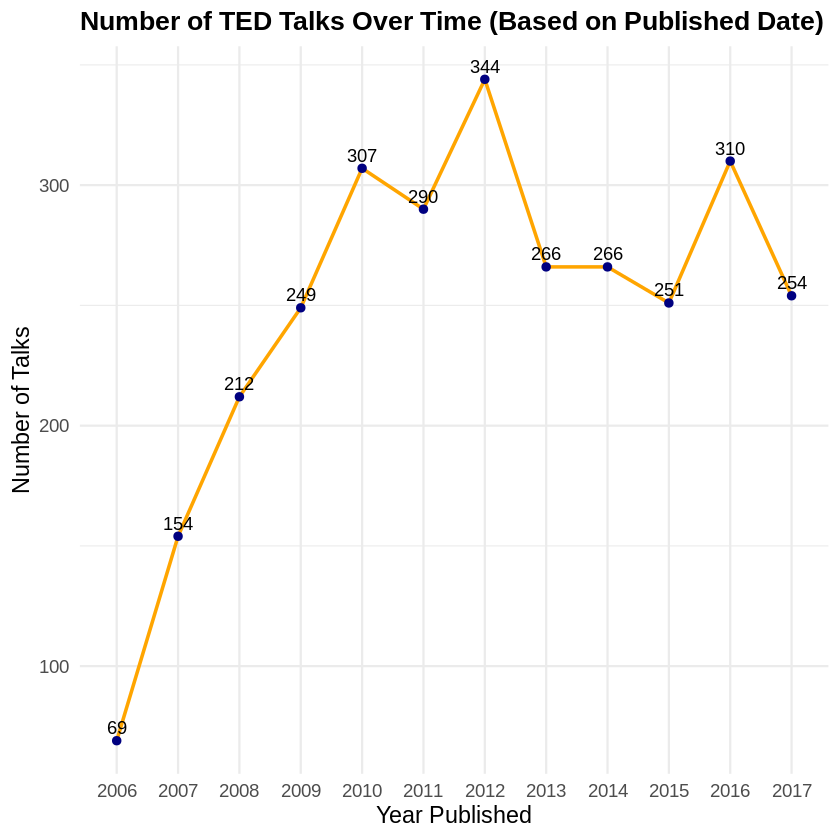

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(lubridate)
library(readxl)

# Read the dataset
ted_data <- read_excel("/content/TED_draft1.xlsx")

# Extracting the year from published_date
ted_data$year_published <- year(ted_data$published_date)

# Trend Analysis Over Time using published_date
# Counting the number of TED Talks per year
talks_per_year_published <- ted_data %>%
  group_by(year_published) %>%
  summarize(count = n()) %>%
  arrange(year_published)

# Plotting the number of TED Talks over time based on published date with an orange line and navy blue points
# ... (the previous part of your code)

# Plotting the number of TED Talks over time based on published date with an orange line and navy blue points
ggplot(talks_per_year_published, aes(x = factor(year_published), y = count, group = 1)) +
  geom_line(color = "orange", size = 1) +
  geom_point(color = "navy", size = 2) +
  geom_text(aes(label = count), vjust = -0.5, color = "black") +  # Add this line for labels
  scale_x_discrete(name = "Year Published") +
  labs(title = "Number of TED Talks Over Time (Based on Published Date)",
       y = "Number of Talks") +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 0.5),
    plot.title = element_text(size = 16, face = "bold"),
    legend.position = "none"
  )

# ... (any additional theme settings)




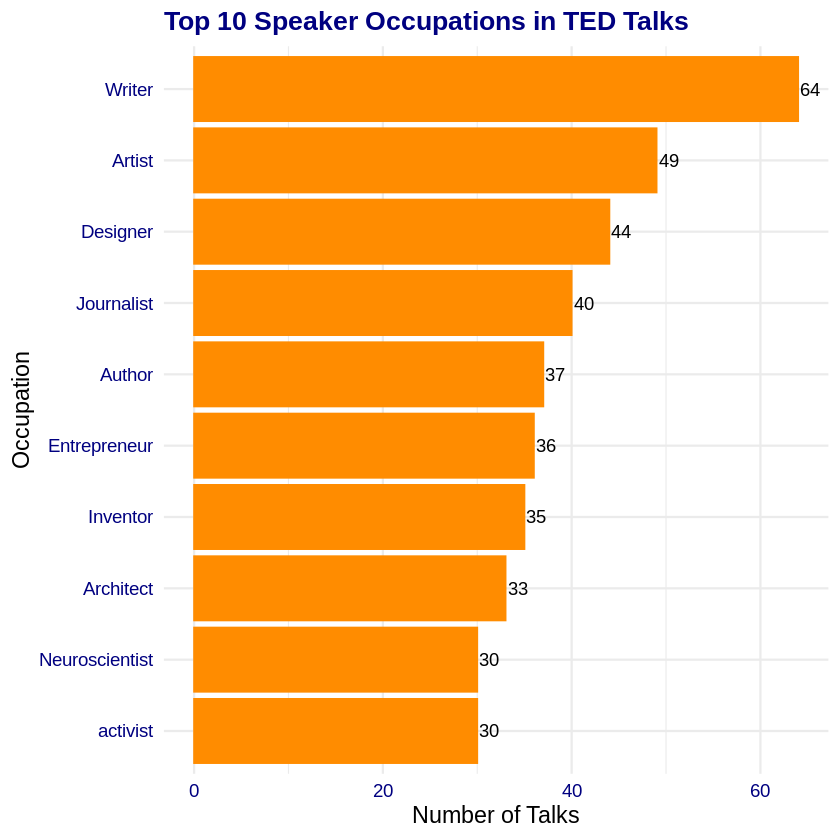

In [ ]:
# Speaker Analysis: Identifying the top 10 most common speaker occupations with a darker shade of orange
top_occupations <- ted_data %>%
  group_by(speaker_occupation) %>%
  summarize(count = n()) %>%
  arrange(desc(count)) %>%
  head(10)

# Plotting the top 10 occupations with a darker shade of orange for the bars
ggplot(top_occupations, aes(x = reorder(speaker_occupation, count), y = count, fill = speaker_occupation)) +
  geom_bar(stat = "identity", color = "darkorange", fill = "darkorange") +
  geom_text(aes(label = count), position = position_dodge(width = 0.9), hjust = -0.1, color = "black") +  # Add this line for labels
  coord_flip() +
  labs(title = "Top 10 Speaker Occupations in TED Talks", x = "Occupation", y = "Number of Talks") +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(color = "navy"),
    axis.text.y = element_text(color = "navy"),
    plot.title = element_text(color = "navy", size = 16, face = "bold"),
    legend.position = "none"
  )

# ... (any additional theme settings)



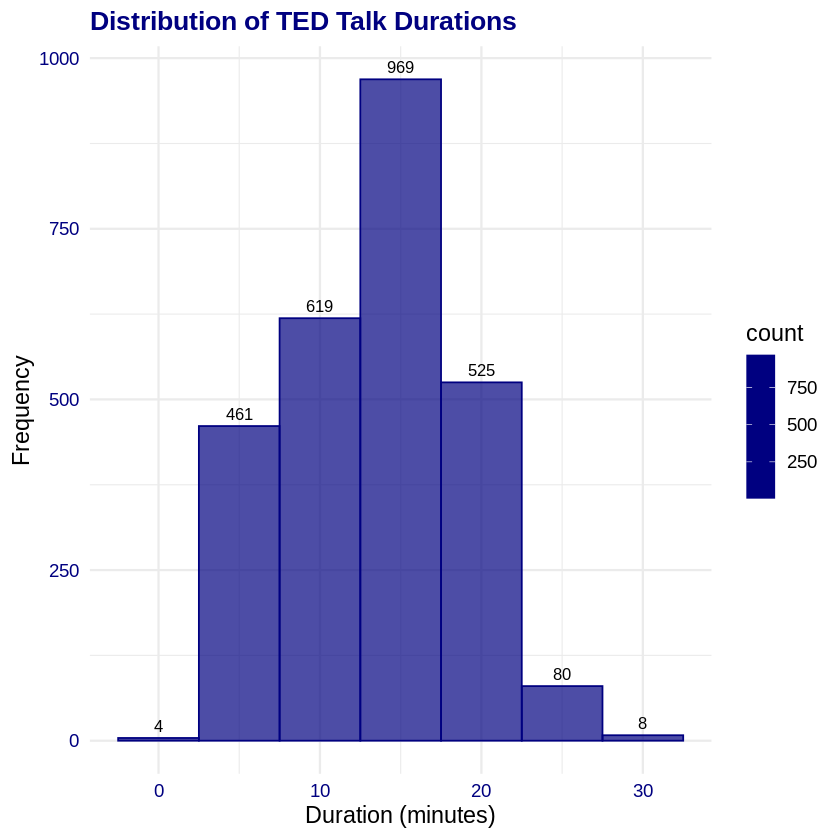

In [ ]:
# # Create a histogram for the distribution of durations with navy blue color
# ggplot(filtered_ted_data, aes(x = duration_minutes, fill = ..count..)) +
#   geom_histogram(binwidth = 5, color = "navy", alpha = 0.7) +  # Set bin width and color to navy blue
#   labs(title = "Distribution of TED Talk Durations", x = "Duration (minutes)", y = "Frequency") +
#   theme_minimal(base_size = 14) +
#   theme(
#     axis.text.x = element_text(color = "navy"),  # Set x-axis text color to navy blue
#     axis.text.y = element_text(color = "navy"),  # Set y-axis text color to navy blue
#     plot.title = element_text(color = "navy", size = 16, face = "bold")  # Set title text properties
#   ) +
#   scale_fill_continuous(low = "navy", high = "navy")  # Set histogram fill color to navy blue

# Remove outliers based on views and duration
views_quantiles <- quantile(ted_data$views, c(0.25, 0.75))
views_iqr <- IQR(ted_data$views)
duration_quantiles <- quantile(ted_data$duration, c(0.25, 0.75))
duration_iqr <- IQR(ted_data$duration)

# Define lower and upper bounds for views and duration
views_lower_bound <- views_quantiles[1] - 1.5 * views_iqr
views_upper_bound <- views_quantiles[2] + 1.5 * views_iqr
duration_lower_bound <- duration_quantiles[1] - 1.5 * duration_iqr
duration_upper_bound <- duration_quantiles[2] + 1.5 * duration_iqr

# Filter the data to remove outliers
filtered_ted_data <- ted_data %>%
  filter(views >= views_lower_bound,
         views <= views_upper_bound,
         duration >= duration_lower_bound,
         duration <= duration_upper_bound)

# Convert views to numerical notation and duration to minutes
filtered_ted_data$numerical_views <- as.numeric(sub("([0-9.]+)e\\+([0-9]+)", "\\1", filtered_ted_data$views))
filtered_ted_data$duration_minutes <- filtered_ted_data$duration / 60

# Create a histogram for the distribution of durations with navy blue color
ggplot(filtered_ted_data, aes(x = duration_minutes, fill = ..count..)) +
  geom_histogram(binwidth = 5, color = "navy", alpha = 0.7) +
  stat_bin(
    aes(label = ..count..),
    geom = "text",
    binwidth = 5,
    vjust = -0.5,
    color = "black",
    size = 3.5
  ) + # Add this line for labels
  labs(title = "Distribution of TED Talk Durations", x = "Duration (minutes)", y = "Frequency") +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.x = element_text(color = "navy"),
    axis.text.y = element_text(color = "navy"),
    plot.title = element_text(color = "navy", size = 16, face = "bold")
  ) +
  scale_fill_continuous(low = "navy", high = "navy")




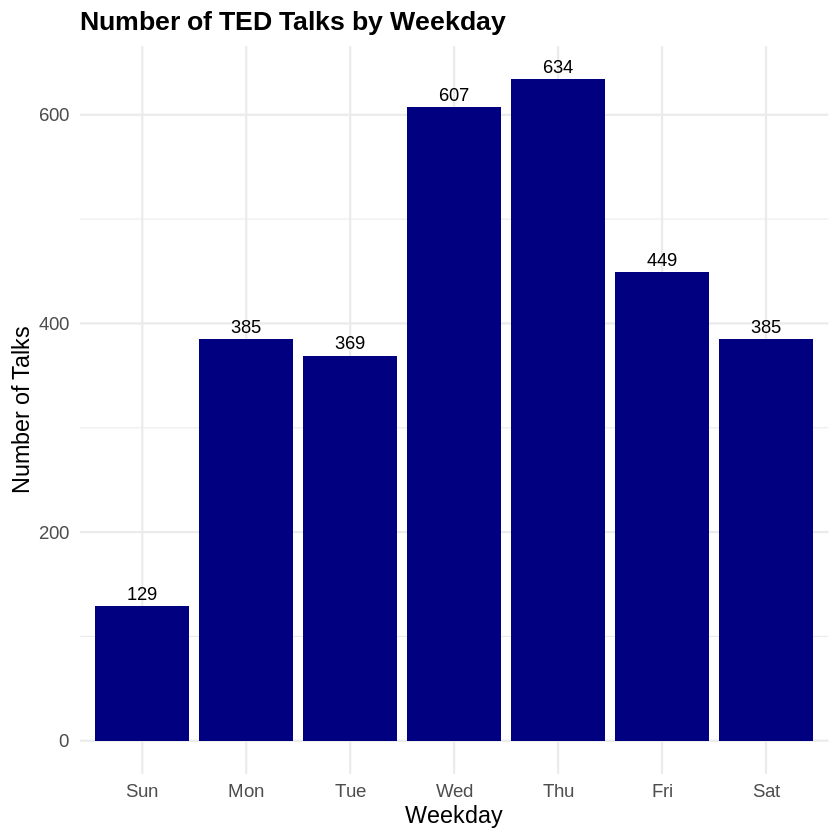

In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(lubridate)
library(readxl)

# Read the dataset
ted_data <- read_excel("/content/TED_draft1.xlsx")

# Convert the 'film_date' to a weekday
ted_data <- ted_data %>%
  mutate(weekday = wday(as.Date(film_date), label = TRUE))

# Aggregate the data by weekday
weekday_counts <- table(ted_data$weekday)

# Convert to dataframe for ggplot
weekday_counts_df <- as.data.frame(weekday_counts)

# Create the bar chart using the navy color
ggplot(weekday_counts_df, aes(x = Var1, y = Freq)) +
  geom_bar(stat = "identity", fill = "navy") +  # Set bar color to navy blue
  geom_text(aes(label = Freq), vjust = -0.5, color = "black") +  # Add text labels
  xlab("Weekday") +
  ylab("Number of Talks") +
  ggtitle("Number of TED Talks by Weekday") +
  theme_minimal(base_size = 14) +  # Use a minimal theme as a base
  theme(
    axis.text.x = element_text(angle = 0, hjust = 0.5),  # Set x-axis text horizontally
    plot.title = element_text(size = 16, face = "bold")  # Set title text properties
  )
